# Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Step 1: Visualizing the Data

First I import the data and display it

In [2]:
df = pd.read_csv('Software-Engineer-Salaries.csv')
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


*Then I output the datatypes of each column should I need to know it later on*

In [3]:
df.dtypes

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
dtype: object

### Creating a histogram of company scores


<Axes: xlabel='Company Score', ylabel='Count'>

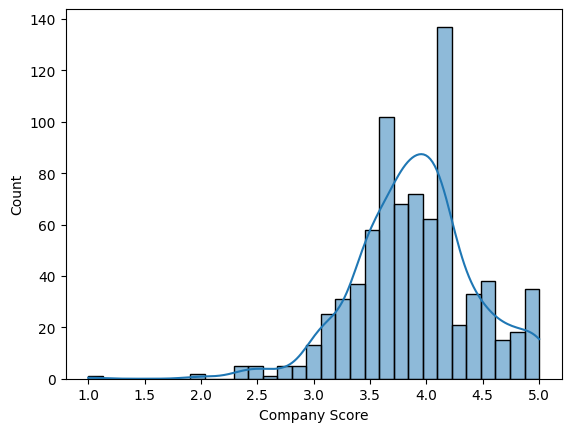

In [4]:
sb.histplot(data=df, x='Company Score', kde=True)

From this I observed that the majority of company scores in the dataset are between 3.5 and 4.5 stars, with an overall left skew

### Creating a boxplot to observe outliers in the dataset

<Axes: xlabel='Company Score'>

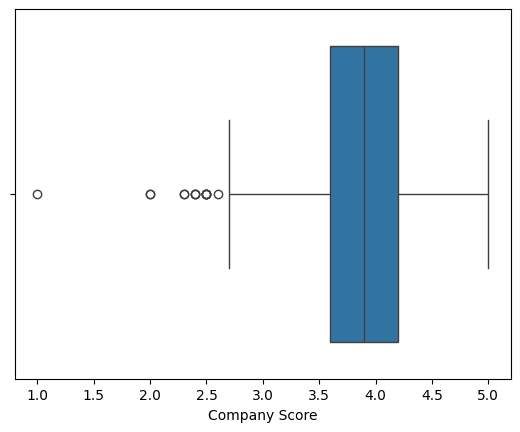

In [5]:
sb.boxplot(data=df, x='Company Score')

From this I can see that there are about five outliers in the dataset, with 1 being a rather extreme outlier

### Observing if location of the job listing had any impact on the company score

<Axes: xlabel='Location', ylabel='Company Score'>

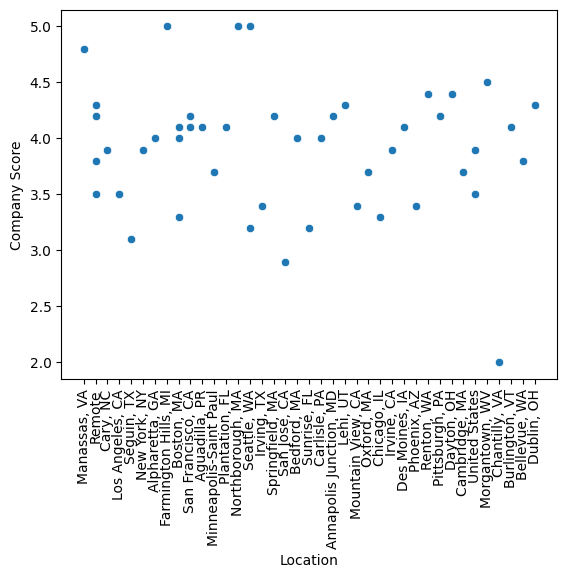

In [6]:
plt.xticks(rotation=90)
sb.scatterplot(data=df.head(50), x='Location', y='Company Score')

The scatterplot makes it appear that the location has very little affect on the score the company recieved

## Step 2: Data cleaning


### Identifying missing values

<Axes: >

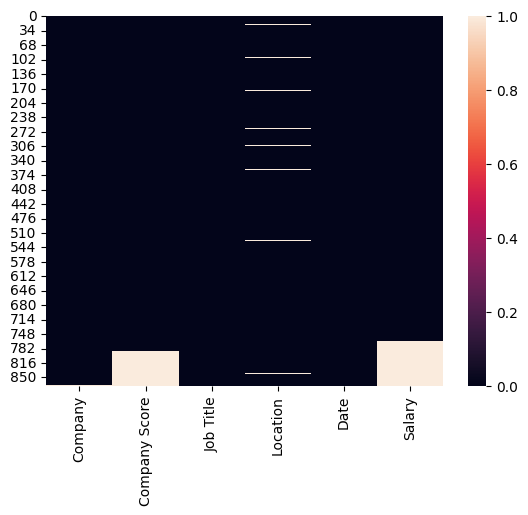

In [7]:
sb.heatmap(data=df.isnull())

In [8]:
df.isnull().sum()

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [9]:
temp = pd.DataFrame(df.isnull().sum())
temp.reset_index(inplace=True)
temp.columns = ['Column_Name', 'Missing_Values']
temp['Missing_Values'] = temp['Missing_Values']/ df.shape[0] * 100
temp.query('Missing_Values > 0')

,Column_Name,Missing_Values
0,Company,0.229885
1,Company Score,9.310345
3,Location,1.494253
5,Salary,12.183908


In [10]:
df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipykernel_20021/827626647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)


Company            2
Company Score      0
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [11]:
import re

def extract_number(string):
  """Extracts the numeric part of a string."""
  return re.findall(r'\d+', string)
    
def split_salary(salary):
    min_salary = 0
    max_salary = 0
    data_source = ''
    temp = salary.split('(')
    if len(temp) == 2:
        data_source = temp[1]
        temp = temp[0].split('-')
        if len(temp) == 2:
            min_salary = int(extract_number(temp[0])[0])
            max_salary = int(extract_number(temp[1])[0])
    return min_salary, max_salary, data_source
df['Salary'] = df['Salary'].astype(str)
df['Salary'] = df.apply(lambda x: split_salary(x.Salary), axis=1)


In [12]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,"(68, 94, Glassdoor est.))"
1,Workiva,4.3,Software Support Engineer,Remote,2d,"(61, 104, Employer est.))"
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,"(95, 118, Glassdoor est.))"
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,"(97, 145, Employer est.))"
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,"(85, 108, Glassdoor est.))"


TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'